<a href="https://colab.research.google.com/github/Yusunkim4448/570finalProject/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install scikit-learn
from sklearn import datasets
import sklearn
print(sklearn.__version__)


1.5.2


In [17]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
simcse_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
diffcse_model = SentenceTransformer('voidism/diffcse-bert-base-uncased-trans')
sentences = [
    "The team showed incredible teamwork throughout the match.",
    "The players worked together seam-lessly during the entire game."
]
simcse_embeddings = simcse_model.encode(sentences)
diffcse_embeddings = diffcse_model.encode(sentences)
similarity_simcse = cosine_similarity([simcse_embeddings[0]], [simcse_embeddings[1]])
similarity_diffcse = cosine_similarity([diffcse_embeddings[0]], [diffcse_embeddings[1]])
print(f"Cosine similarity using SimCSE: {similarity_simcse[0][0]:.4f}")
print(f"Cosine similarity using DiffCSE: {similarity_diffcse[0][0]:.4f}")

Some weights of the model checkpoint at voidism/diffcse-bert-base-uncased-trans were not used when initializing BertModel: ['aux_bert.embeddings.LayerNorm.bias', 'aux_bert.embeddings.LayerNorm.weight', 'aux_bert.embeddings.position_embeddings.weight', 'aux_bert.embeddings.position_ids', 'aux_bert.embeddings.token_type_embeddings.weight', 'aux_bert.embeddings.word_embeddings.weight', 'aux_bert.encoder.layer.0.attention.output.LayerNorm.bias', 'aux_bert.encoder.layer.0.attention.output.LayerNorm.weight', 'aux_bert.encoder.layer.0.attention.output.dense.bias', 'aux_bert.encoder.layer.0.attention.output.dense.weight', 'aux_bert.encoder.layer.0.attention.self.key.bias', 'aux_bert.encoder.layer.0.attention.self.key.weight', 'aux_bert.encoder.layer.0.attention.self.query.bias', 'aux_bert.encoder.layer.0.attention.self.query.weight', 'aux_bert.encoder.layer.0.attention.self.value.bias', 'aux_bert.encoder.layer.0.attention.self.value.weight', 'aux_bert.encoder.layer.0.intermediate.dense.bias', 

Cosine similarity using SimCSE: 0.5489
Cosine similarity using DiffCSE: 0.8087


In [19]:
import wandb

wandb.init(project="sentence-embedding-comparison")
threshold = 0.7

simcse_prediction = 1 if similarity_simcse[0][0] >= threshold else 0
diffcse_prediction = 1 if similarity_diffcse[0][0] >= threshold else 0

print(f"SimCSE Prediction: {'Similar' if simcse_prediction == 1 else 'Dissimilar'}")
print(f"DiffCSE Prediction: {'Similar' if diffcse_prediction == 1 else 'Dissimilar'}")

ground_truth = 1

simcse_accuracy = 1 if simcse_prediction == ground_truth else 0
diffcse_accuracy = 1 if diffcse_prediction == ground_truth else 0

print(f"Accuracy of SimCSE: {simcse_accuracy * 100}%")
print(f"Accuracy of DiffCSE: {diffcse_accuracy * 100}%")

results = [
    {
        "sentence1": sentences[0],
        "sentence2": sentences[1],
        "simcse_similarity": similarity_simcse[0][0],
        "diffcse_similarity": similarity_diffcse[0][0],
        "simcse_accuracy": simcse_accuracy,
        "diffcse_accuracy": diffcse_accuracy
    }
]

for result in results:
    wandb.log({
        "sentence1": result['sentence1'],
        "sentence2": result['sentence2'],
        "simcse_similarity": result['simcse_similarity'],
        "diffcse_similarity": result['diffcse_similarity'],
        "simcse_accuracy": result['simcse_accuracy'],
        "diffcse_accuracy": result['diffcse_accuracy']
    })

wandb.finish()

SimCSE Prediction: Dissimilar
DiffCSE Prediction: Similar
Accuracy of SimCSE: 0%
Accuracy of DiffCSE: 100%


diffcse_accuracy,▁
diffcse_similarity,▁
simcse_accuracy,▁
simcse_similarity,▁
diffcse_accuracy,1
diffcse_similarity,0.80872
sentence1,The team showed incr...
sentence2,The players worked t...
simcse_accuracy,0
simcse_similarity,0.54887


In [20]:
import wandb
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

simcse_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
diffcse_model = SentenceTransformer('voidism/diffcse-bert-base-uncased-trans')
sentence_pairs = [
    ("The quarterback threw an interception.", "The quarterback threw a perfect pass.", 'negative'),
    ("The track team is ready for the upcoming race.", "The football team is prepared for their next game.", 'negative'),
    ("The baseball player made an unbelievable catch.", "The baseball team made a diving catch in the outfield.", 'positive'),
    ("The player celebrated with his teammates after scoring.", "The player celebrated after scoring a touchdown.", 'positive'),
    ("The cyclist won the race by a narrow margin.", "The runner took the gold medal in the race.", 'negative'),
    ("The team secured a victory in overtime.", "The team won the match in the last minute.", 'positive'),
    ("He broke his personal record in the high jump.", "He cleared a new personal best in the high jump.", 'positive'),
    ("The soccer game ended in a penalty shootout.", "The soccer match ended with a 1-1 draw.", 'negative'),
    ("The team had a great start but lost momentum.", "The team dominated the game from start to finish.", 'negative'),
    ("He managed to block the opponent's shot.", "He successfully blocked a shot from the opposing player.", 'positive'),
    ("The boxer knocked out his opponent in the first round.", "The boxer defeated his opponent with a knockout.", 'positive'),
    ("The athlete sprinted to the finish line.", "The runner dashed across the finish line.", 'positive'),
    ("The coach praised the team's effort after the game.", "The coach congratulated the players after the match.", 'positive'),
    ("The basketball player dunked over his opponent.", "The basketball player made an incredible slam dunk.", 'positive'),
    ("The baseball team celebrated after the big win.", "The baseball team celebrated after their victory.", 'positive'),
    ("The player was awarded the MVP trophy after the game.", "The best player of the match was given the MVP award.", 'positive'),
    ("The golfer missed a crucial putt.", "The golfer made a crucial putt on the last hole.", 'negative'),
    ("The swimmer won the gold medal in the Olympics.", "The swimmer secured the silver medal in the Olympics.", 'negative'),
    ("The athlete trained for months for the event.", "The athlete took months to prepare for the competition.", 'positive'),
    ("The team lost the match in the final seconds.", "The team won the match in the dying seconds.", 'negative'),
    ("The player was injured during the match and couldn't continue.", "The player left the field after being injured.", 'negative'),
    ("The soccer team is preparing for the upcoming match.", "The football team is preparing for their next match.", 'negative'),
    ("The football player scored the winning touchdown.", "The basketball player made the game-winning shot.", 'negative'),
    ("The athlete broke the world sprinting record.", "The runner set a new world record for the 100 meters.", 'positive'),
    ("The coach called a timeout to discuss strategy.", "The coach called a timeout to plan the next play.", 'positive'),
    ("The swimmer set a new personal best in the butterfly event.", "The swimmer broke his personal best in the freestyle event.", 'positive')
]

threshold = 0.7

wandb.init(project="sentence-embedding-comparison")

results = []

for sentence_pair in sentence_pairs:
    sentence1, sentence2, label = sentence_pair

    simcse_embeddings = simcse_model.encode([sentence1, sentence2])
    diffcse_embeddings = diffcse_model.encode([sentence1, sentence2])

    similarity_simcse = cosine_similarity([simcse_embeddings[0]], [simcse_embeddings[1]])
    similarity_diffcse = cosine_similarity([diffcse_embeddings[0]], [diffcse_embeddings[1]])

    simcse_prediction = 1 if similarity_simcse[0][0] >= threshold else 0
    diffcse_prediction = 1 if similarity_diffcse[0][0] >= threshold else 0

    simcse_accuracy = 1 if simcse_prediction == (1 if label == 'positive' else 0) else 0
    diffcse_accuracy = 1 if diffcse_prediction == (1 if label == 'positive' else 0) else 0

    results.append({
        "sentence1": sentence1,
        "sentence2": sentence2,
        "label": label,
        "simcse_similarity": similarity_simcse[0][0],
        "diffcse_similarity": similarity_diffcse[0][0],
        "simcse_prediction": 'Similar' if simcse_prediction == 1 else 'Dissimilar',
        "diffcse_prediction": 'Similar' if diffcse_prediction == 1 else 'Dissimilar',
        "simcse_accuracy": simcse_accuracy,
        "diffcse_accuracy": diffcse_accuracy
    })

for result in results:
    wandb.log(result)

wandb.finish()

simcse_final_accuracy = sum([result["simcse_accuracy"] for result in results]) / len(results) * 100
diffcse_final_accuracy = sum([result["diffcse_accuracy"] for result in results]) / len(results) * 100

print(f"Final accuracy of SimCSE: {simcse_final_accuracy:.2f}%")
print(f"Final accuracy of DiffCSE: {diffcse_final_accuracy:.2f}%")


Some weights of the model checkpoint at voidism/diffcse-bert-base-uncased-trans were not used when initializing BertModel: ['aux_bert.embeddings.LayerNorm.bias', 'aux_bert.embeddings.LayerNorm.weight', 'aux_bert.embeddings.position_embeddings.weight', 'aux_bert.embeddings.position_ids', 'aux_bert.embeddings.token_type_embeddings.weight', 'aux_bert.embeddings.word_embeddings.weight', 'aux_bert.encoder.layer.0.attention.output.LayerNorm.bias', 'aux_bert.encoder.layer.0.attention.output.LayerNorm.weight', 'aux_bert.encoder.layer.0.attention.output.dense.bias', 'aux_bert.encoder.layer.0.attention.output.dense.weight', 'aux_bert.encoder.layer.0.attention.self.key.bias', 'aux_bert.encoder.layer.0.attention.self.key.weight', 'aux_bert.encoder.layer.0.attention.self.query.bias', 'aux_bert.encoder.layer.0.attention.self.query.weight', 'aux_bert.encoder.layer.0.attention.self.value.bias', 'aux_bert.encoder.layer.0.attention.self.value.weight', 'aux_bert.encoder.layer.0.intermediate.dense.bias', 

diffcse_accuracy,▁▁██▁██▁▁███████▁▁█▁▁▁▁███
diffcse_similarity,▆▄▄▄▂▃▇▁▂▅▇▆▄▃▇▆▇█▅▇▅▇▁▅▆▆
simcse_accuracy,▁█▁██▁▁████▁▁███▁▁█▁█▁█▁█▁
simcse_similarity,▅▂▅▆▁▄▅▅▅▇▇▅▅▅█▆▇▇▇▇▄▆▂▅▇▅
diffcse_accuracy,1
diffcse_prediction,Similar
diffcse_similarity,0.91797
label,positive
sentence1,The swimmer set a ne...
sentence2,The swimmer broke hi...
simcse_accuracy,0


Final accuracy of SimCSE: 53.85%
Final accuracy of DiffCSE: 57.69%


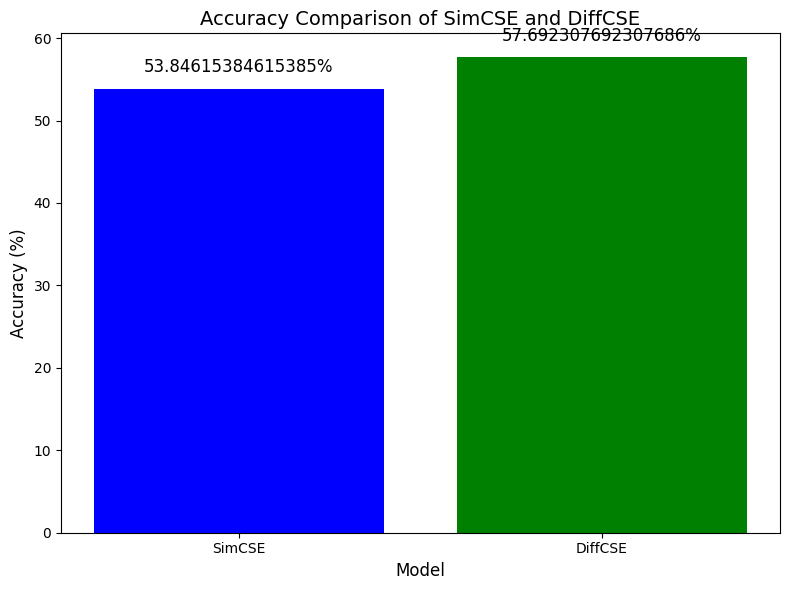

In [21]:
import matplotlib.pyplot as plt


models = ['SimCSE', 'DiffCSE']
accuracies = [simcse_final_accuracy, diffcse_final_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])

plt.title('Accuracy Comparison of SimCSE and DiffCSE', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 2, f'{accuracy}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [24]:
!pip install openai==0.28
import openai
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


simcse_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
def get_ai_feedback(sentence1, sentence2):
    prompt = f"Are these two sentences similar or different?\n\nSentence 1: {sentence1}\nSentence 2: {sentence2}\nAnswer with 'Similar' or 'Different'."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=10,
        temperature=0
    )

    feedback = response['choices'][0]['message']['content'].strip()
    return feedback

def train_with_ai_feedback(sentence_pairs, threshold=0.7):
    results = []

    for sentence_pair in sentence_pairs:
        sentence1, sentence2, label = sentence_pair

        simcse_embeddings = simcse_model.encode([sentence1, sentence2])

        similarity = cosine_similarity([simcse_embeddings[0]], [simcse_embeddings[1]])[0][0]

        ai_feedback = get_ai_feedback(sentence1, sentence2)

        if ai_feedback == 'Similar':
            ai_prediction = 1
        else:
            ai_prediction = 0

        simcse_prediction = 1 if similarity >= threshold else 0
        simcse_accuracy = 1 if simcse_prediction == (1 if label == 'positive' else 0) else 0

        results.append({
            "sentence1": sentence1,
            "sentence2": sentence2,
            "label": label,
            "similarity_score": similarity,
            "ai_feedback": ai_feedback,
            "simcse_prediction": 'Similar' if simcse_prediction == 1 else 'Dissimilar',
            "accuracy": simcse_accuracy,
            "ai_prediction": ai_feedback
        })

    return results

sentence_pairs = [
    ("The quarterback threw an interception.", "The quarterback threw a perfect pass.", 'negative'),
    ("The track team is ready for the upcoming race.", "The football team is prepared for their next game.", 'negative'),
    ("The baseball player made an unbelievable catch.", "The baseball team made a diving catch in the outfield.", 'positive'),
]
results = train_with_ai_feedback(sentence_pairs)

for result in results:
    print(f"Sentence 1: {result['sentence1']}")
    print(f"Sentence 2: {result['sentence2']}")
    print(f"Label: {result['label']}")
    print(f"SimCSE Prediction: {result['simcse_prediction']} | AI Feedback: {result['ai_prediction']}")
    print(f"Similarity Score: {result['similarity_score']:.2f}\n")


Sentence 1: The quarterback threw an interception.
Sentence 2: The quarterback threw a perfect pass.
Label: negative
SimCSE Prediction: Similar | AI Feedback: Different
Similarity Score: 0.70

Sentence 1: The track team is ready for the upcoming race.
Sentence 2: The football team is prepared for their next game.
Label: negative
SimCSE Prediction: Dissimilar | AI Feedback: Different
Similarity Score: 0.40

Sentence 1: The baseball player made an unbelievable catch.
Sentence 2: The baseball team made a diving catch in the outfield.
Label: positive
SimCSE Prediction: Dissimilar | AI Feedback: Different
Similarity Score: 0.66



In [26]:
import torch
import torch.nn as nn
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import openai
simcse_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def get_ai_feedback(sentence1, sentence2):
    prompt = f"Are these two sentences similar or different?\n\nSentence 1: {sentence1}\nSentence 2: {sentence2}\nAnswer with 'Similar' or 'Different'."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=10,
        temperature=0
    )

    feedback = response['choices'][0]['message']['content'].strip()
    return feedback

class ContrastiveLossWithAI(nn.Module):
    def __init__(self, margin=0.3):
        super(ContrastiveLossWithAI, self).__init__()
        self.margin = margin

    def forward(self, embeddings1, embeddings2, labels):
        cosine_sim = cosine_similarity(embeddings1.cpu(), embeddings2.cpu())[0][0]

        loss = torch.mean((1 - labels) * torch.pow(cosine_sim, 2) +
                          labels * torch.pow(torch.clamp(self.margin - cosine_sim, min=0.0), 2))
        return loss

def test_with_ai_feedback(sentence_pairs):
    simcse_model.eval()

    correct = 0
    total = 0

    for sentence1, sentence2, correct_label in sentence_pairs:
        embeddings1 = simcse_model.encode([sentence1], convert_to_tensor=True)
        embeddings2 = simcse_model.encode([sentence2], convert_to_tensor=True)

        cosine_sim = cosine_similarity(embeddings1.cpu(), embeddings2.cpu())[0][0]

        ai_feedback = get_ai_feedback(sentence1, sentence2)

        if cosine_sim > 0.5:
            model_prediction = 'Similar'
        else:
            model_prediction = 'Different'

        if model_prediction == ai_feedback:
            correct += 1
        total += 1

        print(f"Sentence 1: {sentence1}")
        print(f"Sentence 2: {sentence2}")
        print(f"Cosine Similarity: {cosine_sim:.4f}")
        print(f"AI Feedback: {ai_feedback}")
        print(f"Model Prediction: {model_prediction}")
        print(f"Correct: {model_prediction == ai_feedback}")
        print("-" * 50)

    accuracy = correct / total * 100
    print(f"Accuracy: {accuracy:.2f}%")

test_sentence_pairs = [
    ("The quarterback threw an interception.", "The quarterback threw a perfect pass.", 'Different'),
    ("The track team is ready for the upcoming race.", "The football team is prepared for their next game.", 'Different'),
    ("The baseball player made an unbelievable catch.", "The baseball team made a diving catch in the outfield.", 'Similar'),
    ("The soccer team is practicing hard.", "The basketball team is working out for the next season.", 'Different'),
    ("The player scored a goal in the final minute.", "The match ended with a late goal by the striker.", 'Similar'),
]

test_with_ai_feedback(test_sentence_pairs)


Sentence 1: The quarterback threw an interception.
Sentence 2: The quarterback threw a perfect pass.
Cosine Similarity: 0.7017
AI Feedback: Different
Model Prediction: Similar
Correct: False
--------------------------------------------------
Sentence 1: The track team is ready for the upcoming race.
Sentence 2: The football team is prepared for their next game.
Cosine Similarity: 0.4049
AI Feedback: Different
Model Prediction: Different
Correct: True
--------------------------------------------------
Sentence 1: The baseball player made an unbelievable catch.
Sentence 2: The baseball team made a diving catch in the outfield.
Cosine Similarity: 0.6564
AI Feedback: Different
Model Prediction: Similar
Correct: False
--------------------------------------------------
Sentence 1: The soccer team is practicing hard.
Sentence 2: The basketball team is working out for the next season.
Cosine Similarity: 0.3869
AI Feedback: Different
Model Prediction: Different
Correct: True
-------------------

In [48]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=0.3):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, embeddings1, embeddings2, labels):
        cosine_sim = torch.nn.functional.cosine_similarity(embeddings1, embeddings2)
        loss = (1 - labels) * torch.pow(torch.clamp(self.margin - cosine_sim, min=0), 2) + \
               labels * torch.pow(cosine_sim, 2)
        return loss.mean()

class SimCSEModel(torch.nn.Module):
    def __init__(self, model_name='sentence-transformers/all-MiniLM-L6-v2'):
        super(SimCSEModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def encode(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        embeddings = outputs.pooler_output
        return embeddings

sports_data = [
    ("The soccer team won the match 2-1.", "The soccer team beat the opponent 2-1 in the game.", 'Similar'),
    ("The football game had an unexpected turn.", "The match ended with a dramatic finish.", 'Similar'),
    ("The basketball team scored a last-minute 3-pointer.", "The basketball team was trailing the whole game.", 'Different'),
    ("The athlete broke the world record.", "The runner finished the race in under 10 seconds.", 'Similar'),
    ("The baseball player hit a home run.", "The player missed the ball during batting practice.", 'Different'),
    ("The tennis match was canceled due to rain.", "The tennis game was postponed because of bad weather.", 'Similar'),
    ("The boxer knocked out his opponent in the 5th round.", "The boxer won by knockout in the 5th round.", 'Similar'),
    ("The swimmer won a gold medal in the 200m freestyle.", "The swimmer placed first in the 200m freestyle event.", 'Similar'),
    ("The player scored a touchdown in the final seconds.", "The football team won with a touchdown in the last minute.", 'Similar'),
    ("The coach was proud of the team's performance.", "The team coach congratulated the players for their effort.", 'Similar')
]

def preprocess_data(data):
    sentence_pairs = []
    labels = []
    for sentence1, sentence2, label in data:
        sentence_pairs.append((sentence1, sentence2))
        labels.append(1 if label == 'Similar' else 0)
    return sentence_pairs, labels

sentence_pairs, labels = preprocess_data(sports_data)
train_pairs, val_pairs, train_labels, val_labels = train_test_split(sentence_pairs, labels, test_size=0.2, random_state=42)

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

def tokenize_pairs(pairs, tokenizer):
    texts1 = [pair[0] for pair in pairs]
    texts2 = [pair[1] for pair in pairs]
    encoded_input1 = tokenizer(texts1, padding=True, truncation=True, max_length=128, return_tensors='pt')
    encoded_input2 = tokenizer(texts2, padding=True, truncation=True, max_length=128, return_tensors='pt')
    return encoded_input1['input_ids'], encoded_input1['attention_mask'], encoded_input2['input_ids'], encoded_input2['attention_mask']

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

train_input_ids1, train_attention_mask1, train_input_ids2, train_attention_mask2 = tokenize_pairs(train_pairs, tokenizer)
val_input_ids1, val_attention_mask1, val_input_ids2, val_attention_mask2 = tokenize_pairs(val_pairs, tokenizer)

train_dataset = TensorDataset(train_input_ids1, train_attention_mask1, train_input_ids2, train_attention_mask2, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(val_input_ids1, val_attention_mask1, val_input_ids2, val_attention_mask2, val_labels)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

simcse_model = SimCSEModel()

optimizer = torch.optim.Adam(simcse_model.parameters(), lr=5e-5)

def train_model():
    simcse_model.train()
    for epoch in range(5):
        for batch in train_loader:
            input_ids1, attention_mask1, input_ids2, attention_mask2, labels = batch
            optimizer.zero_grad()

            embeddings1 = simcse_model.encode(input_ids1, attention_mask1)
            embeddings2 = simcse_model.encode(input_ids2, attention_mask2)

            loss_fn = ContrastiveLoss()
            loss = loss_fn(embeddings1, embeddings2, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")


def test_model():
    simcse_model.eval()
    correct = 0
    total = 0
    threshold = 0.6
    with torch.no_grad():
        for batch in test_loader:
            input_ids1, attention_mask1, input_ids2, attention_mask2, labels = batch
            embeddings1 = simcse_model.encode(input_ids1, attention_mask1)
            embeddings2 = simcse_model.encode(input_ids2, attention_mask2)

            cosine_sim = torch.nn.functional.cosine_similarity(embeddings1, embeddings2)

            for i in range(len(labels)):
                prediction = 1 if cosine_sim[i] > threshold else 0
                correct += (prediction == labels[i].item())

            total += len(labels)

    accuracy = 100 * correct / total
    print(f"Test Accuracy on Unseen Sentences: {accuracy:.2f}%")

train_model()

test_data = [
    ("The soccer team scored a penalty in the final minute.", "The soccer team won the match with a last-minute penalty.", 'Similar'),
    ("The basketball team won the championship trophy.", "The basketball team was defeated in the finals.", 'Different'),
    ("The swimmer broke the national record in the 100m freestyle.", "The swimmer swam the 100m freestyle in record time.", 'Similar'),
    ("The runner finished the marathon in under two hours.", "The runner completed the race in record time.", 'Similar'),
    ("The football team lost to their rivals by a touchdown.", "The football team was defeated by a touchdown in the final minutes.", 'Similar'),
    ("The baseball team won their game by a grand slam.", "The baseball team lost their match by a close margin.", 'Different'),
    ("The coach gave an inspiring speech before the game.", "The team was motivated by the coach’s pre-game speech.", 'Similar'),
    ("The tennis player won the final with a strong backhand.", "The tennis player lost the match despite a good backhand.", 'Different'),
    ("The boxer defeated his opponent with a knockout punch.", "The boxer lost by decision in a five-round match.", 'Different'),
    ("The hockey team celebrated their victory after scoring the winning goal.", "The hockey team scored the winning goal in overtime.", 'Similar')
]

test_sentence_pairs, test_labels = preprocess_data(test_data)
test_labels = torch.tensor(test_labels)

test_input_ids1, test_attention_mask1, test_input_ids2, test_attention_mask2 = tokenize_pairs(test_sentence_pairs, tokenizer)

test_dataset = TensorDataset(test_input_ids1, test_attention_mask1, test_input_ids2, test_attention_mask2, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

test_model()


Epoch 1, Loss: 0.49081453680992126
Epoch 2, Loss: 0.38812345266342163
Epoch 3, Loss: 0.362373948097229
Epoch 4, Loss: 0.2556438446044922
Epoch 5, Loss: 0.1941322386264801
Test Accuracy on Unseen Sentences: 70.00%
